In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
df = pd.read_csv('cancer_classification.csv')

In [68]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [70]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [71]:
df.shape

(569, 31)

<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

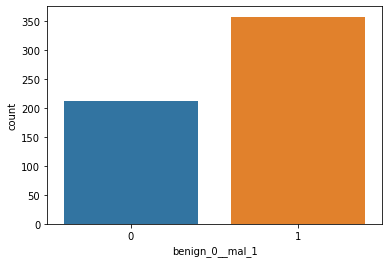

In [72]:
sns.countplot(x='benign_0__mal_1',data=df)

<AxesSubplot:>

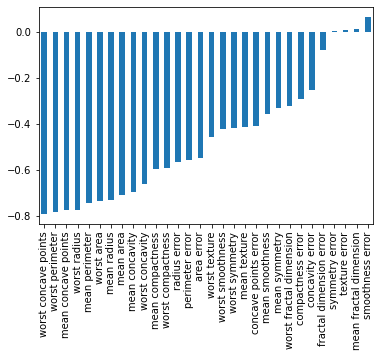

In [73]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

<AxesSubplot:>

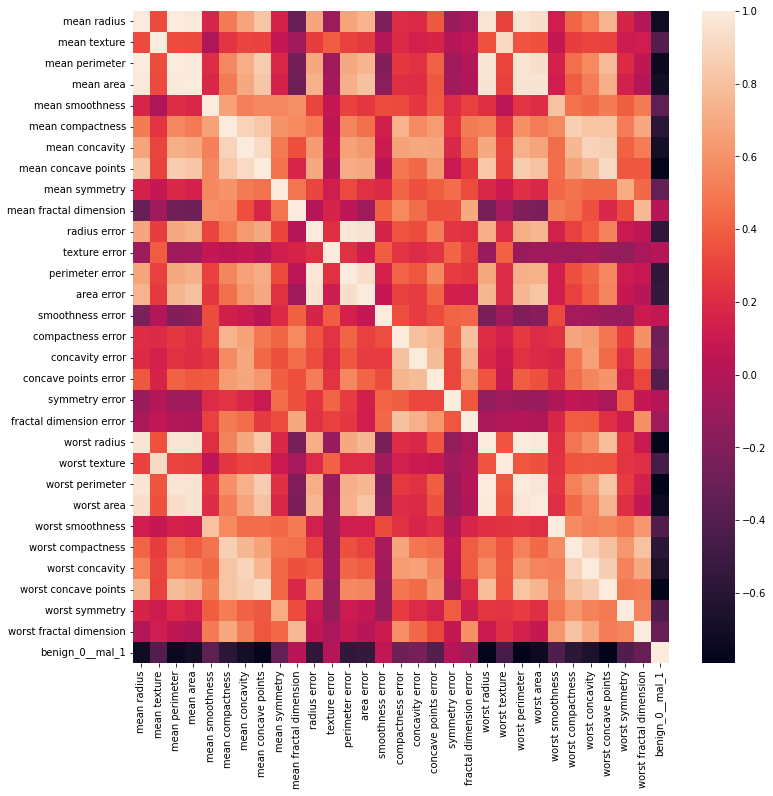

In [74]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr())

In [75]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [78]:
from sklearn.preprocessing import MinMaxScaler

In [79]:
scaler = MinMaxScaler()

In [80]:
X_train = scaler.fit_transform(X_train)

In [81]:
X_test = scaler.transform(X_test)

In [82]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [83]:
from tensorflow.keras.callbacks import EarlyStopping

In [84]:
help(EarlyStopping)

Help on class EarlyStopping in module keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Args:
 |    monitor: Quantity to be monitored.
 |    min_delta: Minimum change in the monitored quantity
 |        to qualify 

In [85]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [86]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid')) # As its a binary classfctn prblm

model.compile(loss='binary_crossentropy',optimizer='adam')

In [87]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 13ms/step - loss: 0.7206 - val_loss: 0.6891
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6896 - val_loss: 0.6731
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6846 - val_loss: 0.6550
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6735 - val_loss: 0.6387
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6381 - val_loss: 0.6149
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6312 - val_loss: 0.5901
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5950 - val_loss: 0.5627
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5793 - val_loss: 0.5352
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5402 - val_loss: 0.5043
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5444 - val_loss: 0.4784
Epoch 11

14/14 [==============================] - 0s 3ms/step - loss: 0.1467 - val_loss: 0.0926
Epoch 84/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1105 - val_loss: 0.0869
Epoch 85/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1291 - val_loss: 0.0900
Epoch 86/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1354 - val_loss: 0.0866
Epoch 87/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1123 - val_loss: 0.0871
Epoch 88/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1227 - val_loss: 0.0858
Epoch 89/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1315 - val_loss: 0.0877
Epoch 90/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1304 - val_loss: 0.0908
Epoch 91/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1290 - val_loss: 0.0925
Epoch 92/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1306 - val_loss: 0.0916
Epoch 93/600


In [88]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

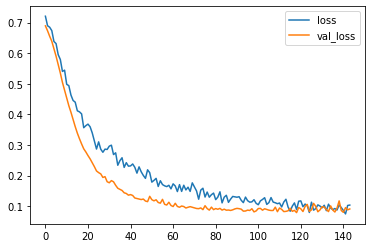

In [89]:
losses.plot()

In [101]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

5/5 [==============================] - 0s 1ms/step


In [102]:
from sklearn.metrics import classification_report,confusion_matrix

In [103]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [104]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 2 86]]
